In [104]:
pip install datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [105]:
from datasets import load_dataset
import pandas as pd

In [106]:
data_train = load_dataset("wmt16","de-en", split="train[:50000]")

In [107]:
print(data_train)

Dataset({
    features: ['translation'],
    num_rows: 50000
})


In [108]:
df_train = pd.DataFrame(data_train)
train_data = []
for i in df_train['translation']:
    de = i['de']
    en = i['en']
    train_data.append((de,en))
print(train_data[:10])

[('Wiederaufnahme der Sitzungsperiode', 'Resumption of the session'), ('Ich erkläre die am Freitag, dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen, wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe, daß Sie schöne Ferien hatten.', 'I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.'), ('Wie Sie feststellen konnten, ist der gefürchtete "Millenium-Bug " nicht eingetreten. Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden.', "Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful."), ('Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tag

In [109]:
data_val = load_dataset("wmt16","de-en", split="validation")

In [110]:
df_val = pd.DataFrame(data_val)
val_data = []
for i in df_val['translation']:
    de = i['de']
    en = i['en']
    val_data.append((de,en))
print(val_data[:10])

[('Die Premierminister Indiens und Japans trafen sich in Tokio.', 'India and Japan prime ministers meet in Tokyo'), ('Indiens neuer Premierminister Narendra Modi trifft bei seinem ersten wichtigen Auslandsbesuch seit seinem Wahlsieg im Mai seinen japanischen Amtskollegen Shinzo Abe in Toko, um wirtschaftliche und sicherheitspolitische Beziehungen zu besprechen.', "India's new prime minister, Narendra Modi, is meeting his Japanese counterpart, Shinzo Abe, in Tokyo to discuss economic and security ties, on his first major foreign visit since winning May's election."), ('Herr Modi befindet sich auf einer fünftägigen Reise nach Japan, um die wirtschaftlichen Beziehungen mit der drittgrößten Wirtschaftsnation der Welt zu festigen.', 'Mr Modi is on a five-day trip to Japan to strengthen economic ties with the third largest economy in the world.'), ('Pläne für eine stärkere kerntechnische Zusammenarbeit stehen ganz oben auf der Tagesordnung.', 'High on the agenda are plans for greater nuclear

In [111]:
data_test = load_dataset("wmt16","de-en", split="test")

In [112]:
pip install torchtext

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [113]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from typing import Iterable, List

In [114]:
df_test = pd.DataFrame(data_test)
test_data = []
for i in df_test['translation']:
    de = i['de']
    en = i['en']
    test_data.append((de,en))
print(test_data[:10])

[('Obama empfängt Netanyahu', 'Obama receives Netanyahu'), ('Das Verhältnis zwischen Obama und Netanyahu ist nicht gerade freundschaftlich.', 'The relationship between Obama and Netanyahu is not exactly friendly.'), ('Die beiden wollten über die Umsetzung der internationalen Vereinbarung sowie über Teherans destabilisierende Maßnahmen im Nahen Osten sprechen.', "The two wanted to talk about the implementation of the international agreement and about Teheran's destabilising activities in the Middle East."), ('Bei der Begegnung soll es aber auch um den Konflikt mit den Palästinensern und die diskutierte Zwei-Staaten-Lösung gehen.', 'The meeting was also planned to cover the conflict with the Palestinians and the disputed two state solution.'), ('Das Verhältnis zwischen Obama und Netanyahu ist seit Jahren gespannt.', 'Relations between Obama and Netanyahu have been strained for years.'), ('Washington kritisiert den andauernden Siedlungsbau Israels und wirft Netanyahu mangelnden Willen bei

In [115]:
SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'

token_transform = {}
vocab_transform = {}

In [116]:
!pip install -U torchdata
!pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [117]:
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 7.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [118]:
token_transform[SRC_LANGUAGE] = get_tokenizer('spacy', language='de_core_news_sm')
token_transform[TGT_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')


# helper function to yield list of tokens
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

# Define special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Training data Iterator
    train_iter = train_data
    # Create torchtext's Vocab object
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(train_iter, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)

# Set ``UNK_IDX`` as the default index. This index is returned when the token is not found.
# If not set, it throws ``RuntimeError`` when the queried token is not found in the Vocabulary.
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  vocab_transform[ln].set_default_index(UNK_IDX)

In [119]:
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# helper Module that adds positional encoding to the token embedding to introduce a notion of word order.
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

# Seq2Seq Network
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)

In [120]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

In [124]:
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in transformer.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

transformer = transformer.to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

In [125]:
from torch.nn.utils.rnn import pad_sequence

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# function to add BOS/EOS and create tensor for input sequence indices
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# ``src`` and ``tgt`` language text transforms to convert raw strings into tensors indices
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                               vocab_transform[ln], #Numericalization
                                               tensor_transform) # Add BOS/EOS and create tensor


# function to collate data samples into batch tensors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

In [126]:
from torch.utils.data import DataLoader

def train_epoch(model, optimizer):
    model.train()
    losses = 0
    train_iter = train_data
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in train_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()

    return losses / len(list(train_dataloader))


def evaluate(model):
    model.eval()
    losses = 0

    val_iter = val_data
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(list(val_dataloader))

/home/deb/.local/lib/python3.10/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Epoch: 1, Train loss: 6.211, Val loss: 6.752, Epoch time = 70.457s
Epoch: 2, Train loss: 5.000, Val loss: 6.670, Epoch time = 70.545s
Epoch: 3, Train loss: 4.600, Val loss: 6.482, Epoch time = 70.695s
Epoch: 4, Train loss: 4.290, Val loss: 6.374, Epoch time = 70.763s
Epoch: 5, Train loss: 4.024, Val loss: 6.267, Epoch time = 70.855s
Epoch: 6, Train loss: 3.794, Val loss: 6.188, Epoch time = 70.803s
Epoch: 7, Train loss: 3.589, Val loss: 6.117, Epoch time = 70.773s
Epoch: 8, Train loss: 3.400, Val loss: 6.057, Epoch time = 70.754s
Epoch: 9, Train loss: 3.218, Val loss: 5.994, Epoch time = 70.741s
Epoch: 10, Train loss: 3.053, Val loss: 5.954, Epoch time = 70.772s
Epoch: 11, Train loss: 2.908, Val loss: 5.910, Epoch time = 70.786s
Epoch: 12, Train loss: 2.775, Val loss: 5.999, Epoch time = 70.686s
Epoch: 13, Train loss: 2.647, Val loss: 5.960, Epoch time = 70.721s
Epoch: 14, Train loss: 2.523, Val loss: 5.957, Epoch time = 70.752s
Epoch: 15, Train loss: 2.413, Val loss: 6.007, Epoch time

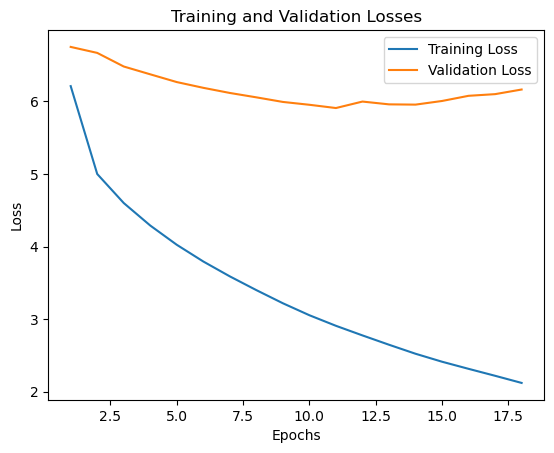

In [127]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt

train_losses = []
val_losses = []

NUM_EPOCHS = 18


for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(transformer, optimizer)
    end_time = timer()
    val_loss = evaluate(transformer)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
    
plt.plot(range(1, NUM_EPOCHS+1), train_losses, label='Training Loss')
plt.plot(range(1, NUM_EPOCHS+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [134]:
import torch

# Specify the file path where you want to save the model
model_save_path = "task2A.pt"

# Save the model
torch.save(transformer.state_dict(), model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at task2A.pt


In [135]:
# function to generate output sequence using greedy algorithm
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


# Modified translate function to ensure all tensors are on the same device
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1).to(DEVICE)  # Move src to DEVICE
    num_tokens = src.shape[0]
    src_mask = torch.zeros(num_tokens, num_tokens).type(torch.bool).to(DEVICE)  # Move src_mask to DEVICE
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten().to(DEVICE)  # Move tgt_tokens to DEVICE
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

In [169]:
print(translate(transformer, "Eine Katze sitzt auf der Matte."))

 A misunderstanding on the basis of consultation . 


In [131]:
pip install bert_score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [137]:
transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                    NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)
transformer.load_state_dict(torch.load('task2A.pt'))
transformer = transformer.to(DEVICE)

/home/deb/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [138]:
# compute the metrics
results = []
for i in range(len(val_data)):
    src = val_data[i][0]
    tgt = val_data[i][1]
    pred = translate(transformer, src)
    results.append((src, tgt, pred))

hypotheses_val = [[sentence] for sentence in [x[2] for x in results]]
references_val = [[sentence] for sentence in [x[1] for x in results]]

results = []
for i in range(len(test_data)):
    src = test_data[i][0]
    tgt = test_data[i][1]
    pred = translate(transformer, src)
    results.append((src, tgt, pred))
    
hypotheses_test = [[sentence] for sentence in [x[2] for x in results]]
references_test = [[sentence] for sentence in [x[1] for x in results]]

In [147]:
print(hypotheses_val[:5])
print(references_val[:5])

[[' The Prime Minister of Independent Experts and Energy is in the event of Enschede . '], [' He has been able to discuss new posts in its first important discussions with its predecessors in May its Finnish television , whereas in May its first pillar , economic and diplomatic relations . '], [' Mr Perry is a step towards the Finnish television channel , to the economic relations with the forthcoming world and foremost discussions . '], [' Both work for greater cooperation are quite different for cooperation . '], [' According to reports , India would also be able to prepare a Treaty for manoeuvre between two nations . ']]
[['India and Japan prime ministers meet in Tokyo'], ["India's new prime minister, Narendra Modi, is meeting his Japanese counterpart, Shinzo Abe, in Tokyo to discuss economic and security ties, on his first major foreign visit since winning May's election."], ['Mr Modi is on a five-day trip to Japan to strengthen economic ties with the third largest economy in the w

In [159]:
temp_hypo_val = [x[0] for x in hypotheses_val]
print(temp_hypo_val[:5])

[' The Prime Minister of Independent Experts and Energy is in the event of Enschede . ', ' He has been able to discuss new posts in its first important discussions with its predecessors in May its Finnish television , whereas in May its first pillar , economic and diplomatic relations . ', ' Mr Perry is a step towards the Finnish television channel , to the economic relations with the forthcoming world and foremost discussions . ', ' Both work for greater cooperation are quite different for cooperation . ', ' According to reports , India would also be able to prepare a Treaty for manoeuvre between two nations . ']


In [162]:
temp_hypo_test = [x[0] for x in hypotheses_test]
print(temp_hypo_test[:5])

[' Relating to Community insurance ', ' The relationship between Swissair and gentlemen , is not just an informal basis . ', ' The two wanted to discuss the implementation of the international agreement and for resolutions , together with an interim action programmes . ', ' However , we should also take the conflict with the Seattle - and the German versions to discuss discussions . ', ' The relationship between appointments and gentlemen , has been very curious for years . ']


In [167]:
'''from datasets import load_metric
metric = load_metric("sacrebleu")'''
import evaluate
bleu = evaluate.load('bleu')

bleu_score = bleu.compute(predictions=temp_hypo_val, references=references_val, max_order=1)
print("Validation BLEU-1 Score:", bleu_score)
bleu_score = bleu.compute(predictions=temp_hypo_val, references=references_val, max_order=2)
print("Validation BLEU-2 Score:", bleu_score)
bleu_score = bleu.compute(predictions=temp_hypo_val, references=references_val, max_order=3)
print("Validation BLEU-3 Score:", bleu_score)
bleu_score = bleu.compute(predictions=temp_hypo_val, references=references_val, max_order=4)
print("Validation BLEU-4 Score:", bleu_score)

bleu_score = bleu.compute(predictions=temp_hypo_test, references=references_test, max_order = 1)
print("Test BLEU-1 Score:", bleu_score)
bleu_score = bleu.compute(predictions=temp_hypo_test, references=references_test, max_order = 2)
print("Test BLEU-2 Score:", bleu_score)
bleu_score = bleu.compute(predictions=temp_hypo_test, references=references_test, max_order = 3)
print("Test BLEU-3 Score:", bleu_score)
bleu_score = bleu.compute(predictions=temp_hypo_test, references=references_test, max_order = 4)
print("Test BLEU-4 Score:", bleu_score)

Validation BLEU-1 Score: {'bleu': 0.31581628494579833, 'precisions': [0.31581628494579833], 'brevity_penalty': 1.0, 'length_ratio': 1.0566931507439226, 'translation_length': 49076, 'reference_length': 46443}
Validation BLEU-2 Score: {'bleu': 0.15169960866671464, 'precisions': [0.31581628494579833, 0.07286758905920225], 'brevity_penalty': 1.0, 'length_ratio': 1.0566931507439226, 'translation_length': 49076, 'reference_length': 46443}
Validation BLEU-3 Score: {'bleu': 0.08174647886948301, 'precisions': [0.31581628494579833, 0.07286758905920225, 0.023737678535505933], 'brevity_penalty': 1.0, 'length_ratio': 1.0566931507439226, 'translation_length': 49076, 'reference_length': 46443}
Validation BLEU-4 Score: {'bleu': 0.046390844376141084, 'precisions': [0.31581628494579833, 0.07286758905920225, 0.023737678535505933, 0.008478557001268261], 'brevity_penalty': 1.0, 'length_ratio': 1.0566931507439226, 'translation_length': 49076, 'reference_length': 46443}
Test BLEU-1 Score: {'bleu': 0.32094267

In [139]:
from datasets import load_metric
# Load the METEOR metric
metric = load_metric("meteor")
meteor_score = metric.compute(predictions=hypotheses_val, references=references_val)
print("Validation METEOR Score:", meteor_score)

meteor_score = metric.compute(predictions=hypotheses_test, references=references_test)
print("Test METEOR Score:", meteor_score)

/home/deb/.local/lib/python3.10/site-packages/datasets/load.py:756: FutureWarning: The repository for meteor contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/meteor/meteor.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
[nltk_data] Downloading package wordnet to /home/deb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/deb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/deb/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Validation METEOR Score: {'meteor': 0.3516015046228352}
Test METEOR Score: {'meteor': 0.3558839072684144}


In [140]:
from datasets import load_metric

# Load the BERTScore metric
metric = load_metric("bertscore")

# Compute the BERTScore for validation data
bertscore_score_val = metric.compute(predictions=hypotheses_val, references=references_val, lang="en")

# Compute the BERTScore for test data
bertscore_score_test = metric.compute(predictions=hypotheses_test, references=references_test, lang="en")

# Extract the precision scores
val_precision = bertscore_score_val["precision"]
test_precision = bertscore_score_test["precision"]

# Calculate the average precision score for validation and test sets
avg_val_precision = sum(val_precision) / len(val_precision)
avg_test_precision = sum(test_precision) / len(test_precision)

print("Average Validation BERTScore Precision:", avg_val_precision)
print("Average Test BERTScore Precision:", avg_test_precision)

/home/deb/.local/lib/python3.10/site-packages/datasets/load.py:756: FutureWarning: The repository for bertscore contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/bertscore/bertscore.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Average Validation BERTScore Precision: 0.8219276331382284
Average Test BERTScore Precision: 0.8229262863210377


In [168]:
import pandas as pd
df = pd.read_csv('input_2A.csv')
df['en'] = df['de'].apply(lambda x: translate(transformer, x))
df.to_csv('output2A.csv', index=False)
print("Output CSV saved as output2A.csv")

Output CSV saved as output2A.csv
